In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
data_train = pd.read_csv('/content/drive/MyDrive/datasets/is/Mushroom_Train.csv')
le = LabelEncoder()
ord_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
x_train = ord_encoder.fit_transform(data_train.iloc[:,1:].to_numpy())
y_train = le.fit_transform(data_train.iloc[:,0].to_numpy())

In [ ]:
class Naive_bayes:
    def fit(self, x, y):
        self.x_train = x
        self.y_train = y
        self.classes = np.unique(y)
        self.priors = np.zeros(len(self.classes))
        count_samples, self.count_features = self.x_train.shape
        for i,label in enumerate(self.classes):
          class_examples = np.sum(self.y_train == label)
          self.priors[i] =  (class_examples+1) / (count_samples+len(self.classes))

    def conditional_prob(self, label, target_col, target_val):
      x_c = self.x_train[self.y_train==label] 
      return (np.sum(x_c[:, target_col] == target_val)+1) / (len(x_c)+len(self.classes))
    
    def predict_(self, X_test):
      probs_post = []
      for label in self.classes:
        likelihood = np.log(self.priors[label])
        for feature in range(self.count_features):
          condition_prob = np.log(self.conditional_prob(label, feature, X_test[feature]))
          likelihood += condition_prob
        probs_post.append(likelihood)
      return np.argmax(probs_post) 
    
    def predict(self, x_test):
        y_prediction = []
        for data in x_test:
            y_prediction.append(self.predict_(data))
        return np.array(y_prediction)


In [ ]:
classifier = Naive_bayes()
classifier.fit(x_train,y_train)
pred = classifier.predict(x_train)

accuracy on train set  =  0.9544736842105264 



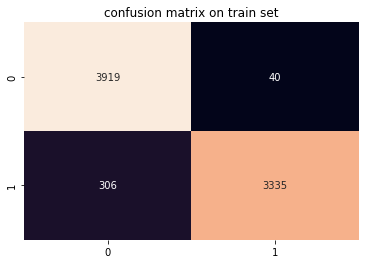

In [ ]:
print(f'accuracy on train set  =  {accuracy_score(pred,y_train)} \n')
sns.heatmap(confusion_matrix(y_train, pred), annot= True, fmt='g', cbar=False)
plt.title('confusion matrix on train set')
plt.show()

In [ ]:
data_test = pd.read_csv('/content/drive/MyDrive/datasets/is/Mushroom_Test.csv')
x_test = ord_encoder.transform(data_test.iloc[:,1:].to_numpy())
y_test = le.transform(data_test.iloc[:,0].to_numpy())

accuracy on test set  =  0.9866412213740458 



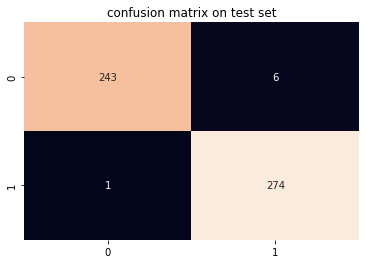

In [ ]:
y_pred = classifier.predict(x_test)
print(f'accuracy on test set  =  {accuracy_score(y_pred,y_test)} \n')
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, fmt='g', cbar=False)
plt.title('confusion matrix on test set')
plt.show()